


# **Heart Attack Data Analysis**




**Importing the necessary modules**

In [ ]:
import pandas as pd   # data handling
import numpy as np    # array handling
import matplotlib.pyplot as plt # for visualization
from sklearn.model_selection import train_test_split # splits tha data into train and test
from sklearn.preprocessing import StandardScaler    # to Standarize the data

# models
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# accuracy measures
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, mean_squared_error, average_precision_score

**Data Reading:**

In [ ]:
df = pd.read_csv("heart.csv") # reading the data file

df.head()  # data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Data Analysis:**

In [ ]:
print(f"Number of rows in dataset: {df.shape[0]}") 
print(f"Number of columns in dataset: {df.shape[1]}")

Number of rows in dataset: 303
Number of columns in dataset: 14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Data Partition:**

In [ ]:
x = df.iloc[:,0:13].values    # seprating input variables
y = df.iloc[:,-1].values      # seprating output variables

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)    # splitting the data into test and train 


**Standarizing the input Data:**

In [ ]:
scale = StandardScaler()
train_x = scale.fit_transform(train_x)
test_x = scale.transform(test_x)

**Applying the KNN model:**

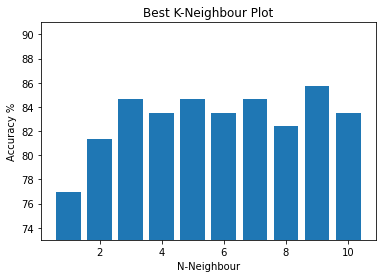

Best N-Neigbour is: 9
Confusion Matrix: 
[[30  9]
 [ 4 48]]
Accuracy: 0.8571428571428571
Mean Squared Error: 0.14285714285714285
F1 score: 0.8807339449541285


In [ ]:
all_neighbours = []
for i in range(0, 10):  # finding the best K with respect to accuracy
  KNN = KNeighborsClassifier(i+1)
  KNN.fit(train_x, train_y)

  predict_y = KNN.predict(test_x)
  accuracy = accuracy_score(test_y, predict_y)*100
  all_neighbours.append(accuracy)

best_neighbour = all_neighbours.index(max(all_neighbours)) + 1 

# Plotting the best K

n = [i for i in range(1, len(all_neighbours)+1)]
all = all_neighbours

low = min(all)
high = max(all)
plt.ylim([np.ceil(low-0.5*(high-low)), np.ceil(high+0.5*(high-low))])
plt.bar(n,all)
plt.title("Best K-Neighbour Plot")
plt.xlabel("N-Neighbour")
plt.ylabel("Accuracy %")
plt.show()

print(f"Best N-Neigbour is: {best_neighbour}")

KNN = KNeighborsClassifier(best_neighbour)  # Model with best k
KNN.fit(train_x, train_y)

predict_y = KNN.predict(test_x) # predicted result for test data

KNN_accuracy = accuracy_score(test_y, predict_y)
KNN_f1 = f1_score(test_y, predict_y)
KNN_mse = mean_squared_error(test_y, predict_y)
KNN_percision = average_precision_score(test_y, predict_y)

print(f"Confusion Matrix: \n{confusion_matrix(test_y, predict_y)}")   # Conusion matrix
print(f"Accuracy: {KNN_accuracy}")  # accuracy score for test data
print(f"Mean Squared Error: {KNN_mse}") # Mean Squared Error
print(f"F1 score: {KNN_f1}") # F1-score

**Applying the Decision Tree:**

In [ ]:
clf = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
clf.fit(train_x, train_y)

predict_y = clf.predict(test_x) # predicted y for test data

clf_accuracy = accuracy_score(test_y, predict_y)
clf_f1 = f1_score(test_y, predict_y)
clf_mse = mean_squared_error(test_y, predict_y)
clf_percision = average_precision_score(test_y, predict_y)

print(f"Confusion Matrix: \n{confusion_matrix(test_y, predict_y)}")   # Conusion matrix
print(f"Accuracy: {clf_accuracy}")  # accuracy score for test data
print(f"Mean Squared Error: {clf_mse}") # Mean Squared Error
print(f"F1 score: {clf_f1}") # F1-score

Confusion Matrix: 
[[29 10]
 [14 38]]
Accuracy: 0.7362637362637363
Mean Squared Error: 0.26373626373626374
F1 score: 0.76


**Applying Logistic Regression:**

In [ ]:
lr = LogisticRegression()
lr.fit(train_x, train_y)

predict_y = lr.predict(test_x)

lr_accuracy = accuracy_score(test_y, predict_y)
lr_f1 = f1_score(test_y, predict_y)
lr_mse = mean_squared_error(test_y, predict_y)
lr_percision = average_precision_score(test_y, predict_y)

print(f"Confusion Matrix: \n{confusion_matrix(test_y, predict_y)}")   # Conusion matrix
print(f"Accuracy: {lr_accuracy}")  # accuracy score for test data
print(f"Mean Squared Error: {lr_mse}") # Mean Squared Error
print(f"F1 score: {lr_f1}") # F1-score

Confusion Matrix: 
[[32  7]
 [ 5 47]]
Accuracy: 0.8681318681318682
Mean Squared Error: 0.13186813186813187
F1 score: 0.8867924528301887


**Applying Support Vector Classifier:**

In [ ]:
sv = SVC(kernel='linear')
sv.fit(train_x, train_y)

predict_y = sv.predict(test_x)

sv_accuracy = accuracy_score(test_y, predict_y)
sv_f1 = f1_score(test_y, predict_y)
sv_mse = mean_squared_error(test_y, predict_y)
sv_percision = average_precision_score(test_y, predict_y)

print(f"Confusion Matrix: \n{confusion_matrix(test_y, predict_y)}")   # Conusion matrix
print(f"Accuracy: {sv_accuracy}")  # accuracy score for test data
print(f"Mean Squared Error: {sv_mse}") # Mean Squared Error
print(f"F1 score: {sv_f1}") # F1-score

Confusion Matrix: 
[[31  8]
 [ 8 44]]
Accuracy: 0.8241758241758241
Mean Squared Error: 0.17582417582417584
F1 score: 0.8461538461538461


**Finding the Best Model:**

In [ ]:
df_accuracy = pd.DataFrame({'Model': ['K-Nearest Neighbour','Decisoin Tree','Logistic Regression','Support Vector Machine'],
                         'Accuracy': [KNN_accuracy*100, clf_accuracy*100, lr_accuracy*100, sv_accuracy*100]})
df_accuracy

,Model,Accuracy
0,K-Nearest Neighbour,85.714286
1,Decisoin Tree,73.626374
2,Logistic Regression,86.813187
3,Support Vector Machine,82.417582


**Plotting the Analysis:**

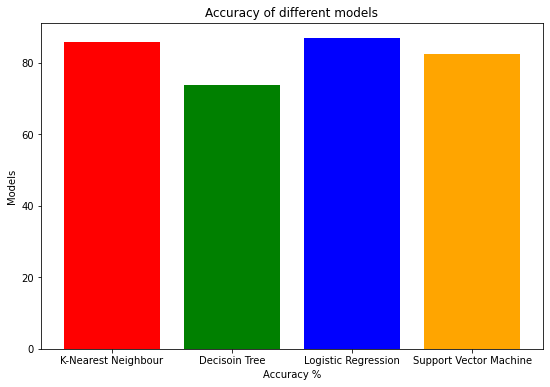

The best model is: Logistic Regression 
with Accuracy: 86.81318681318682


In [ ]:
plt.figure(figsize=(9,6))
plt.xlabel("Accuracy %")
plt.ylabel("Models")
plt.title("Accuracy of different models")
plt.bar(df_accuracy['Model'],df_accuracy['Accuracy'], color= ['red', 'green', 'blue', 'orange'])
plt.show()

row = df_accuracy.iloc[:,-1].argmax()


print(f'The best model is: {df_accuracy.iloc[row,0]} \nwith Accuracy: {list(df_accuracy.max())[-1]}')

**Finding the Features Importance:**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  import sys


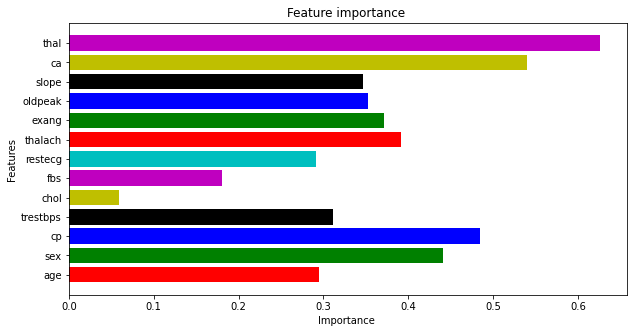

In [ ]:
df_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
                            'Importance': [abs(each) for each in sv.coef_.flatten()]})
plt.figure(figsize=(10,5))
plt.title("Feature importance ")
plt.xlabel("Importance ")
plt.ylabel("Features")
plt.barh(df_feature['Feature'], df_feature['Importance'],color = 'rgbkymc')
plt.show()

**Detailed Evaluation Measures:**

In [ ]:
df_measures = pd.DataFrame({'Model': ['K-Nearest Neighbour','Decision Tree','Logistic Regression','Support Vector Machine'],
                         'Accuracy': [KNN_accuracy, clf_accuracy, lr_accuracy, sv_accuracy],
                         'F1-score': [KNN_f1, clf_f1, lr_f1, sv_f1],
                         'MSE': [KNN_mse, clf_mse, lr_mse, sv_f1],
                         'Percision': [KNN_percision, clf_percision, lr_percision, sv_percision]})
df_measures

,Model,Accuracy,F1-score,MSE,Percision
0,K-Nearest Neighbour,0.857143,0.880734,0.142857,0.821284
1,Decisoin Tree,0.736264,0.760000,0.263736,0.732372
2,Logistic Regression,0.868132,0.886792,0.131868,0.841626
3,Support Vector Machine,0.824176,0.846154,0.846154,0.803888


**Conclusion:**</br>
  By analysing, we can clearly see the following deatils:</br>

1.   Thal has the most effect on the heart attack </br>
2.   The best model is Logistic Regression for this data.

